<a href="https://colab.research.google.com/github/QuangThang12/Writechain-/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd

In [50]:
df=pd.read_csv ('lab1_data.csv')

Question 1:
Display the data types of each column using the function dtypes


In [51]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Question 2
Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data



In [52]:
df = df.drop(columns=['id' ])
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Question 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.


In [53]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Question 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.



<Axes: xlabel='waterfront', ylabel='price'>

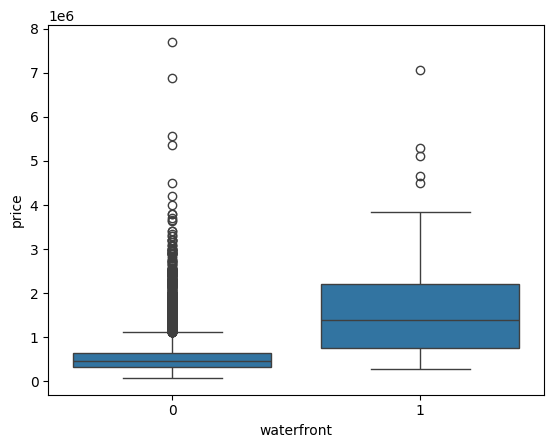

In [54]:
import seaborn as sns
x = df['waterfront']
y = df['price']

sns.boxplot(x=x, y=y, data=df)

Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price

<Axes: xlabel='sqft_above', ylabel='price'>

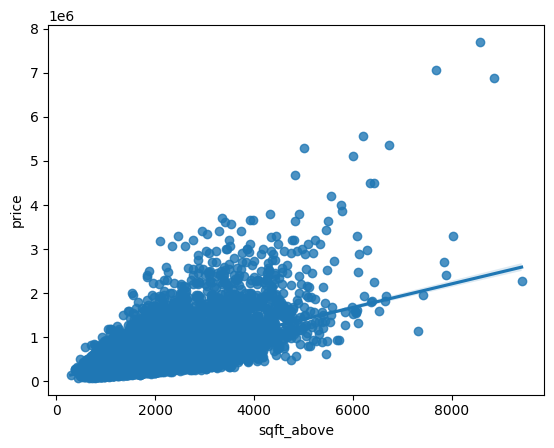

In [55]:
x = df['sqft_above']
y = df['price']

sns.regplot(data = df, x = x, y = y)

Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X = df[['sqft_living']]
y = df['price']

#setup train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

#setup model

model = LinearRegression()
model.fit(X_train, y_train)

#predict on the test set
y_pred = model.predict(X_test)

#calculate R^2 score with the y_test
R2 = r2_score(y_test, y_pred)

print(R2)

0.4755438365076825


Question 7
Fit a linear regression model to predict the 'price' using the list of features: features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
Then calculate the R^2.


In [57]:
X = df[["floors", "waterfront","lat" ,"bedrooms" ,
        "sqft_basement" ,"view" ,"bathrooms","sqft_living15",
        "sqft_above","grade","sqft_living"]]

y = df['price']

#setup train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

#setup model

model = LinearRegression()
model.fit(X_train, y_train)

#predict on the test set
y_pred = model.predict(X_test)

#calculate R^2 score with the y_test
R2 = r2_score(y_test, y_pred)

print(R2)

0.6524870493359494


Question 8
Create a list of tuples, the first element in the tuple contains the name of the estimator:
'scale'
'polynomial'
'model'
The second element in the tuple contains the model constructor
StandardScaler()
PolynomialFeatures(include_bias=False)
LinearRegression()
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [58]:
from sklearn.preprocessing import StandardScaler # Importing StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# Creating the list of tuples
estimators = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Display the list
print(estimators)

[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]


Question 9
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.


In [59]:
from sklearn.pipeline import Pipeline


X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

pipeline = Pipeline(estimators)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

R2 = r2_score(y_test, y_pred)

print(R2)

0.5042141281885416


Question 10
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [60]:
from sklearn.linear_model import Ridge


X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

R2 = r2_score(y_test, y_pred)

print(R2)

0.4755438365078899


Question 11
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.


In [61]:
# Define features and target
X = df[['sqft_living']]
y = df['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Degree Polynomial
poly = PolynomialFeatures(degree=2)

# Transform the features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Ridge regression with regularization = 0.1
ridge_model = Ridge(alpha=0.1)

# Train the model
ridge_model.fit(X_train_poly_scaled, y_train)

# Predict
y_pred = ridge_model.predict(X_test_poly_scaled)

# Calculate R^2 score
R2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {R2}")

R^2 Score: 0.5042141559501119
